In [36]:
import numpy as np
import pandas as pd
import pymc3 as pm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

custom_style = {'axes.labelcolor': 'black',
                'xtick.color': 'black',
                'ytick.color': 'black'}
sns.set_style("darkgrid", rc=custom_style)

# read data by pandas
df = pd.read_csv("data/Allstorms.ibtracs_wmo.v03r05.csv", delim_whitespace=False)

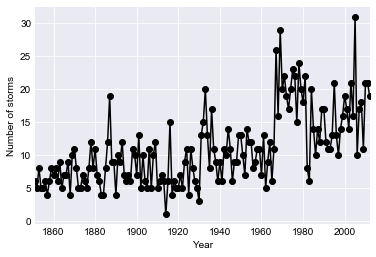

In [37]:
cnt = df[df["Basin"] == ' NA'].groupby('Season')['Serial_Num'].nunique()
years = cnt.index
y0, y1 = years[0], years[-1]
arr = cnt.values
plt.plot(years, arr, '-ok')
plt.xlim(y0, y1)
plt.xlabel("Year")
plt.ylabel("Number of storms")

In [63]:
basic_model = pm.Model()

with basic_model:
    
    switchpoint = pymc3.DiscreteUniform('switchpoint', lower=0, upper=len(arr))
    early_mean = pymc3.Exponential('early_mean', 1.0)
    late_mean = pymc3.Exponential('late_mean', 1.0)
    
    rate = pm.Deterministic('rate', )